In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df=pd.read_csv("ds_salaries.csv")

In [7]:
df.groupby("work_year").mean()["salary_in_usd"]

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_3780\1058958796.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("work_year").mean()["salary_in_usd"]


work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_3780\124029907.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.pie(df.groupby("work_year").mean()["salary_in_usd"],labels=["2020","2021","2022","2023"],autopct="%1.2f",explode=[0.1,0.1,0.1,0.1])


([<matplotlib.patches.Wedge at 0x156a7dc8dd0>,
 [Text(0.9776387190940392, 0.695861002591873, '2020'),
  Text(-0.35109501593100234, 1.1474895597731638, '2021'),
  Text(-1.162614361106533, -0.2972000123634725, '2022'),
  Text(0.6495120063392914, -1.0090263394089911, '2023')],
 [Text(0.5702892528048561, 0.40591891817859255, '19.69'),
  Text(-0.20480542595975135, 0.6693689098676789, '20.07'),
  Text(-0.6781917106454776, -0.17336667387869228, '28.44'),
  Text(0.3788820036979199, -0.5885986979885781, '31.79')])

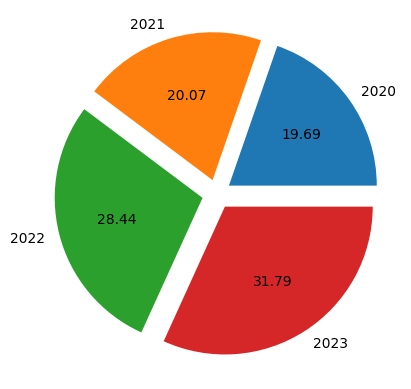

In [9]:
plt.pie(df.groupby("work_year").mean()["salary_in_usd"],labels=["2020","2021","2022","2023"],autopct="%1.2f",explode=[0.1,0.1,0.1,0.1])

<AxesSubplot: xlabel='experience_level', ylabel='salary_in_usd'>

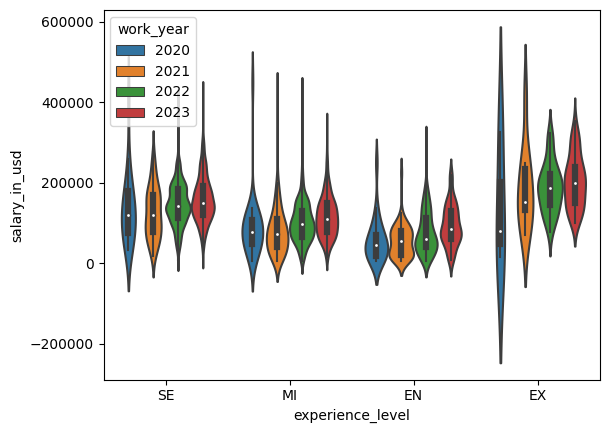

In [12]:
sns.violinplot(x=df["experience_level"],y=df["salary_in_usd"],hue=df["work_year"])

<AxesSubplot: xlabel='experience_level', ylabel='work_year'>

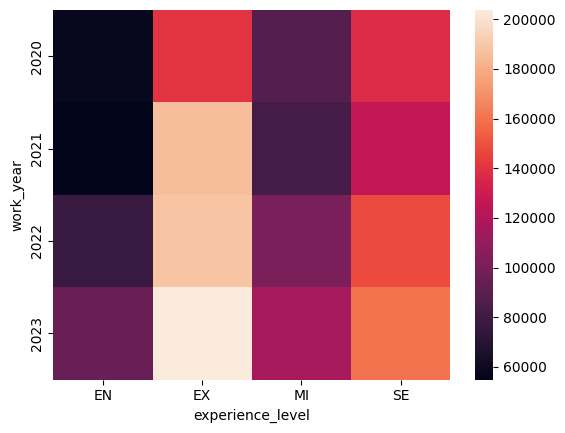

In [15]:
sns.heatmap(df.pivot_table(index="work_year",columns="experience_level",values="salary_in_usd",aggfunc="mean"))

Text(0.5, 1.0, 'Medium scale')

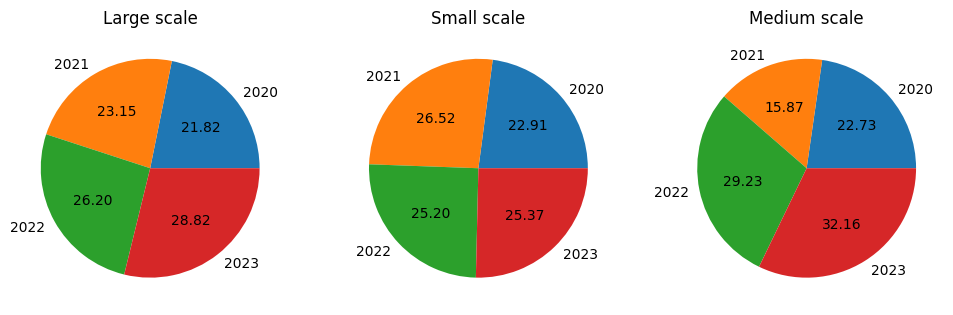

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pie(a["L"],labels=a.index,autopct="%1.2f")
plt.title("Large scale")
plt.subplot(1,3,2)
plt.pie(a["S"],labels=a.index,autopct="%1.2f")
plt.title("Small scale")
plt.subplot(1,3,3)
plt.pie(a["M"],labels=a.index,autopct="%1.2f")
plt.title("Medium scale")

In [33]:
b=df.pivot_table(index="company_size",columns="work_year",values="salary_in_usd",aggfunc="mean")
b

work_year,2020,2021,2022,2023
company_size,,,,
L,101000.371429,107165.700787,121281.959391,133379.400000
M,106626.437500,74463.035714,137132.464968,150867.202038
S,70958.560000,82129.446809,78050.851852,78579.772727


In [39]:
l=[]
m=[]
n=[]
for i in b.columns:
    l.append(df.pivot_table(index="company_size",columns="work_year",values="salary_in_usd",aggfunc="mean")[i][0:3].sum())
    m.append(df.pivot_table(index="company_size",columns="work_year",values="salary_in_usd",aggfunc="mean")[i][0:2].sum())
    n.append(df.pivot_table(index="company_size",columns="work_year",values="salary_in_usd",aggfunc="mean")[i][0:1].sum())
    


l

[278585.3689285714, 263758.1833101979, 336465.2762108677, 362826.374765642]

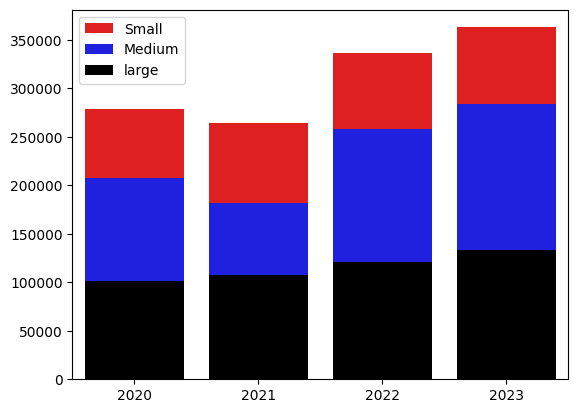

In [52]:
sns.barplot(y=l,x=["2020","2021","2022","2023"],label="Small",palette=["red","red","red","red"])
sns.barplot(y=m,x=["2020","2021","2022","2023"],label="Medium",palette=["blue","blue","blue","blue"])
sns.barplot(y=n,x=["2020","2021","2022","2023"],label="large",palette=["black","black","black","black"])

plt.legend()
#i can even write their percentage by using the text props

In [21]:
a=df.pivot_table(index="work_year",columns="company_size",values="salary_in_usd",aggfunc="mean")
for i in a.columns:
    plt.pie(a[i],labels=a.index,autopct="%1.2f")
    plt.title(i)

Index(['L', 'M', 'S'], dtype='object', name='company_size')

<AxesSubplot: xlabel='company_size', ylabel='work_year'>

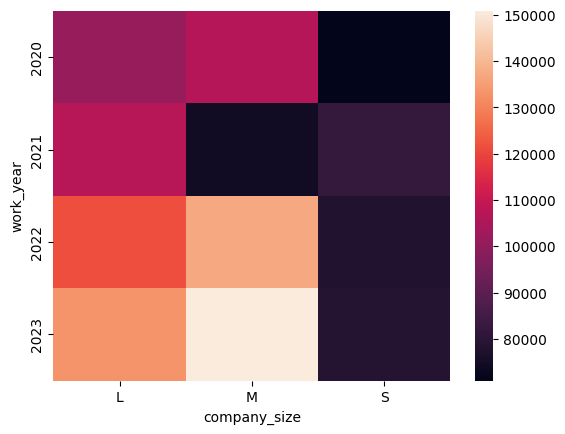

In [17]:

sns.heatmap(df.pivot_table(index="work_year",columns="company_size",values="salary_in_usd",aggfunc="mean"))

<AxesSubplot: xlabel='work_year', ylabel='company_size'>

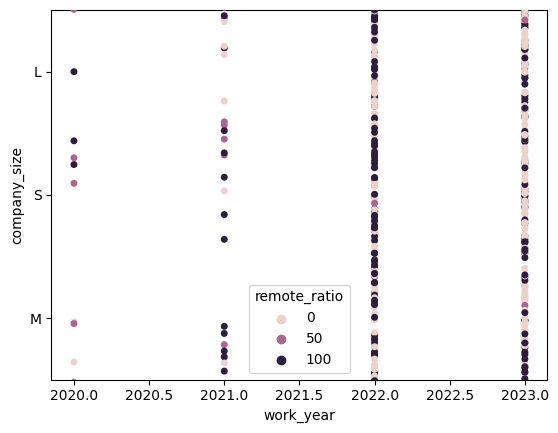

In [59]:
sns.stripplot(hue=df["remote_ratio"],x=df["work_year"],y=df["company_size"],jitter=12)

<AxesSubplot: xlabel='work_year', ylabel='salary'>

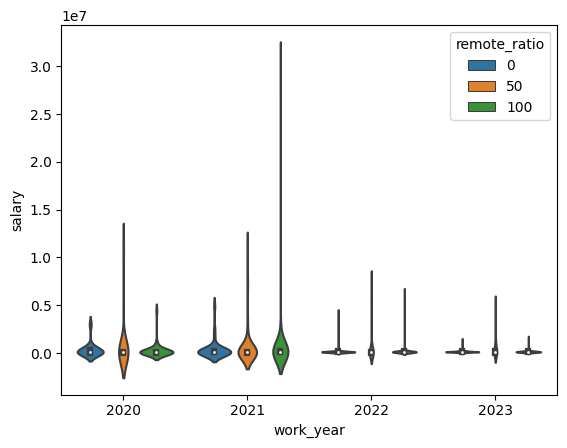

In [63]:
sns.violinplot(hue=df["remote_ratio"],y=df["salary"],x=df["work_year"])

<AxesSubplot: >

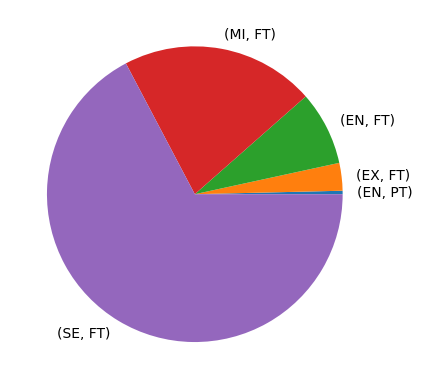

In [74]:
df.groupby(["experience_level","employment_type"]).size().sort_values().tail(5).plot(kind="pie")

(0.0, 2000000.0)

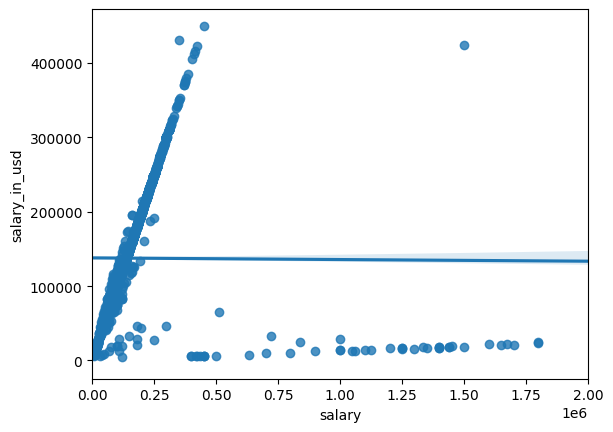

In [10]:
sns.regplot(x=df.salary,y=df.salary_in_usd)
plt.xlim(0,2000000)



(0.0, 2000000.0)

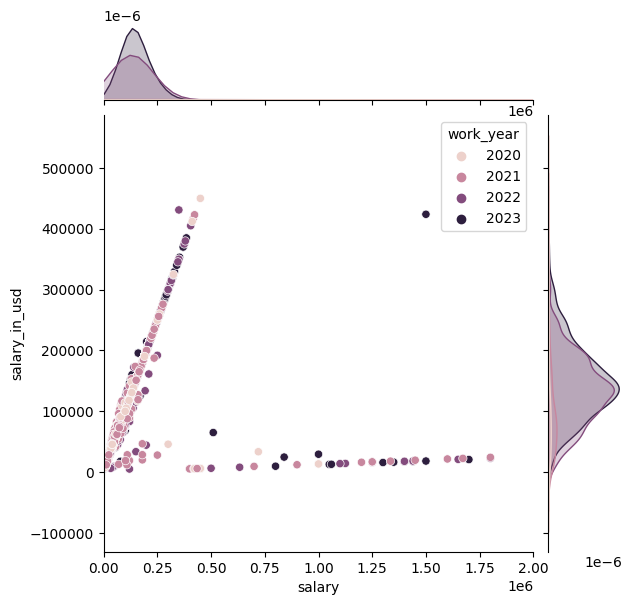

In [7]:
sns.jointplot(x=df.salary,y=df.salary_in_usd,hue=df["work_year"])
plt.xlim(0,2000000)

<AxesSubplot: xlabel='remote_ratio', ylabel='salary_in_usd'>

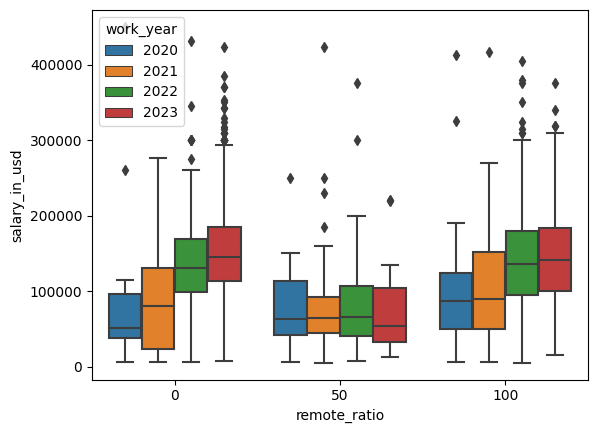

In [12]:
sns.boxplot(y=df["salary_in_usd"],x=df["remote_ratio"],hue=df["work_year"])

Text(0.5, 1.0, '2023')

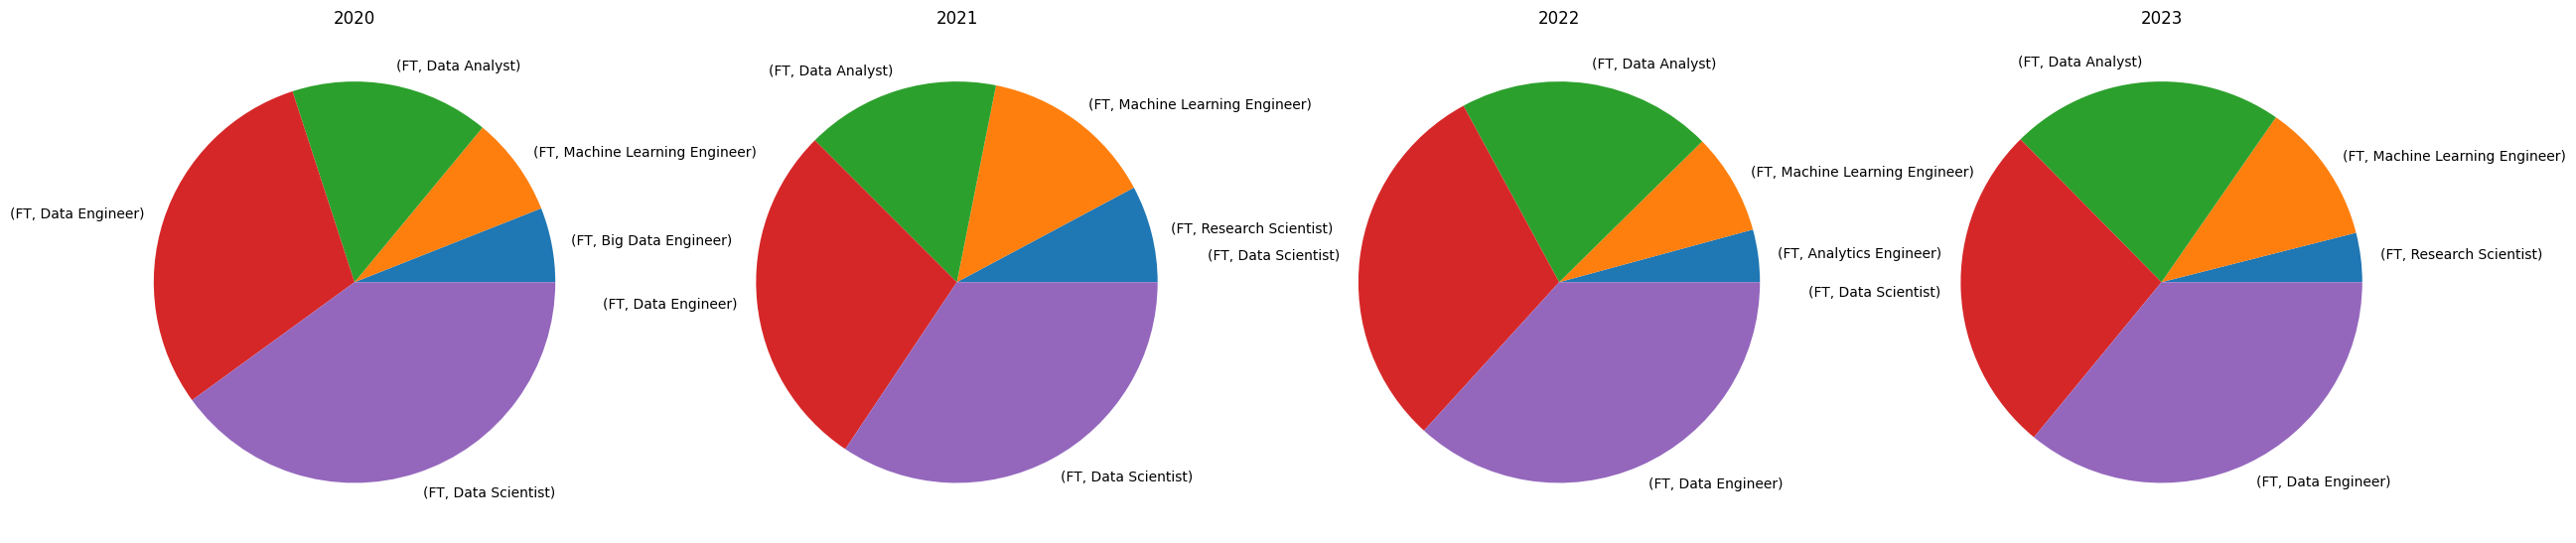

In [18]:

plt.figure(figsize=(30,45))
plt.subplot(1,4,1)
p=df[df["work_year"]==2020]
p.groupby(["employment_type","job_title",]).size().sort_values().tail(5).plot(kind="pie")
plt.title("2020")
plt.subplot(1,4,2)
q=df[df["work_year"]==2021]
q.groupby(["employment_type","job_title",]).size().sort_values().tail(5).plot(kind="pie")
plt.title("2021")
plt.subplot(1,4,3)
r=df[df["work_year"]==2022]
r.groupby(["employment_type","job_title",]).size().sort_values().tail(5).plot(kind="pie")
plt.title("2022")
plt.subplot(1,4,4)
s=df[df["work_year"]==2023]
s.groupby(["employment_type","job_title",]).size().sort_values().tail(5).plot(kind="pie")
plt.title("2023")


<AxesSubplot: xlabel='work_year', ylabel='salary_in_usd'>

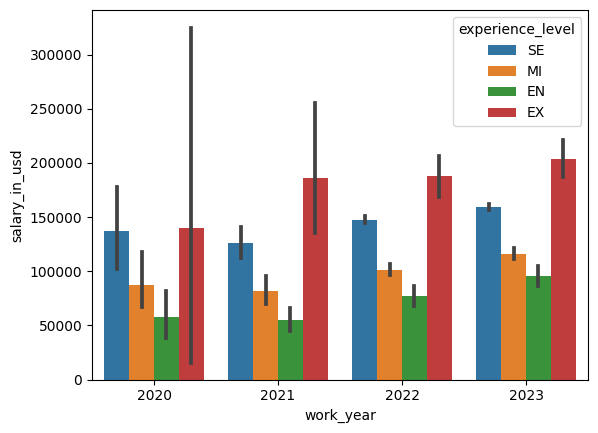

In [19]:
sns.barplot(y=df["salary_in_usd"],x=df["work_year"],hue=df["experience_level"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'EUR'),
  Text(1, 0, 'USD'),
  Text(2, 0, 'INR'),
  Text(3, 0, 'HKD'),
  Text(4, 0, 'CHF'),
  Text(5, 0, 'GBP'),
  Text(6, 0, 'AUD'),
  Text(7, 0, 'SGD'),
  Text(8, 0, 'CAD'),
  Text(9, 0, 'ILS'),
  Text(10, 0, 'BRL'),
  Text(11, 0, 'THB'),
  Text(12, 0, 'PLN'),
  Text(13, 0, 'HUF'),
  Text(14, 0, 'CZK'),
  Text(15, 0, 'DKK'),
  Text(16, 0, 'JPY'),
  Text(17, 0, 'MXN'),
  Text(18, 0, 'TRY'),
  Text(19, 0, 'CLP')])

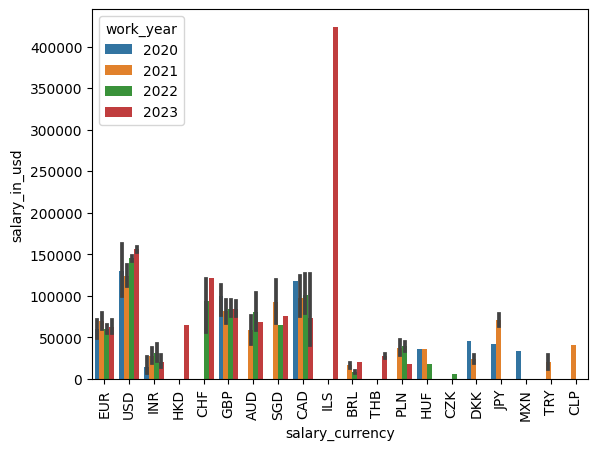

In [22]:
sns.barplot(y=df["salary_in_usd"],hue=df["work_year"],x=df["salary_currency"])
plt.xticks(rotation=90)

AttributeError: module 'seaborn' has no attribute 'regaplot'

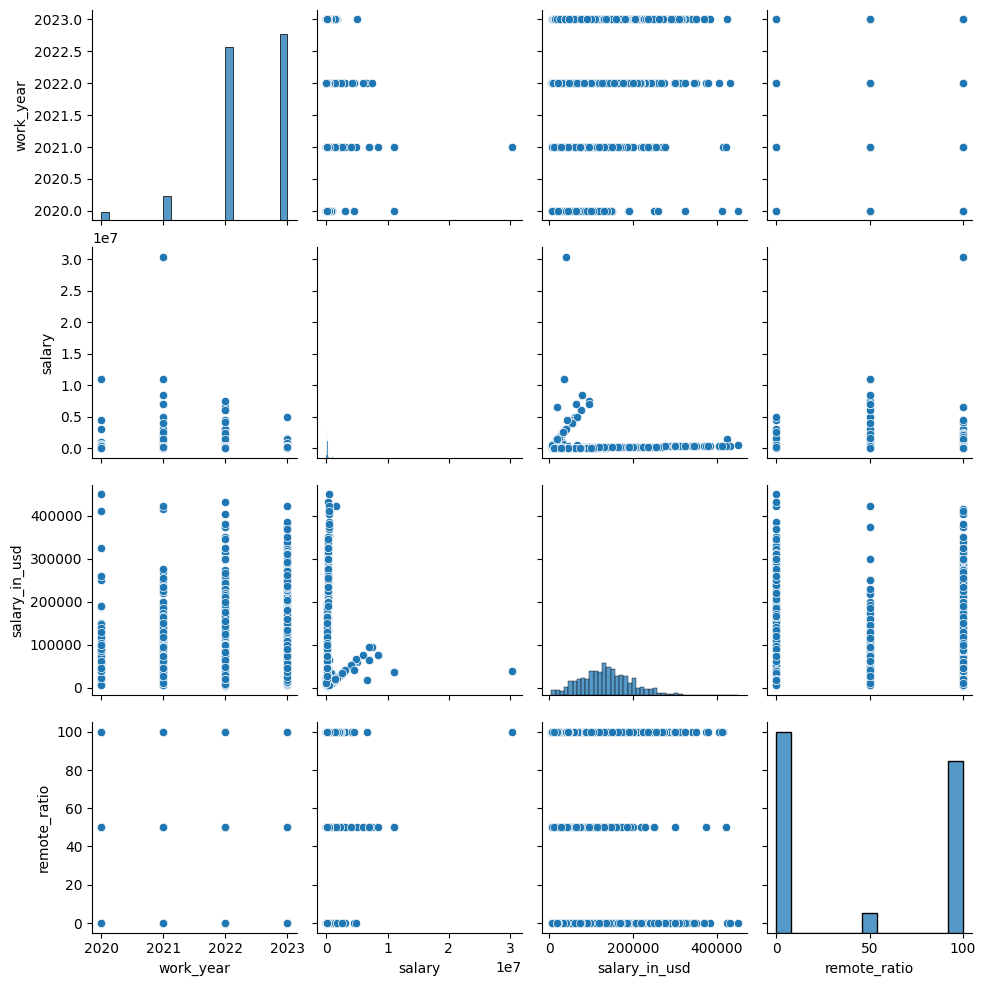

In [32]:
sns.pairplot(df)

<AxesSubplot: xlabel='remote_ratio', ylabel='salary_in_usd'>

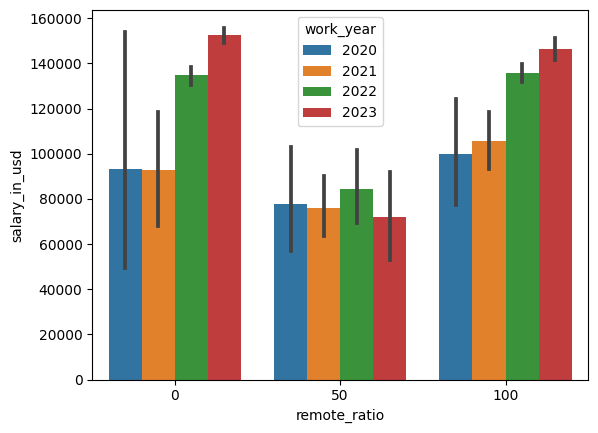

In [33]:
sns.barplot(x=df["remote_ratio"],y=df["salary_in_usd"],hue=df["work_year"])

In [12]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


<AxesSubplot: >

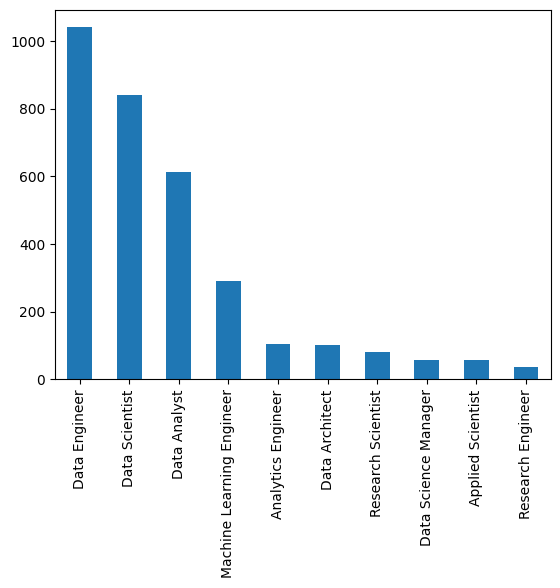

In [41]:
df["job_title"].value_counts()[0:10].plot(kind="bar")

In [ ]:
df.groupby().get_groups() is not working

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_8776\445914279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

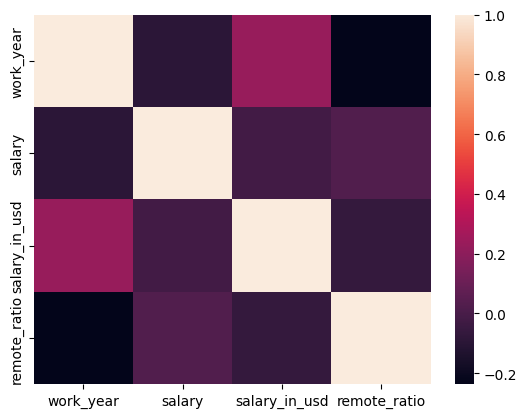

In [49]:
sns.heatmap(df.corr())
#plt.legend()


In [ ]:
df

<AxesSubplot: xlabel='None-work_year', ylabel='job_title'>

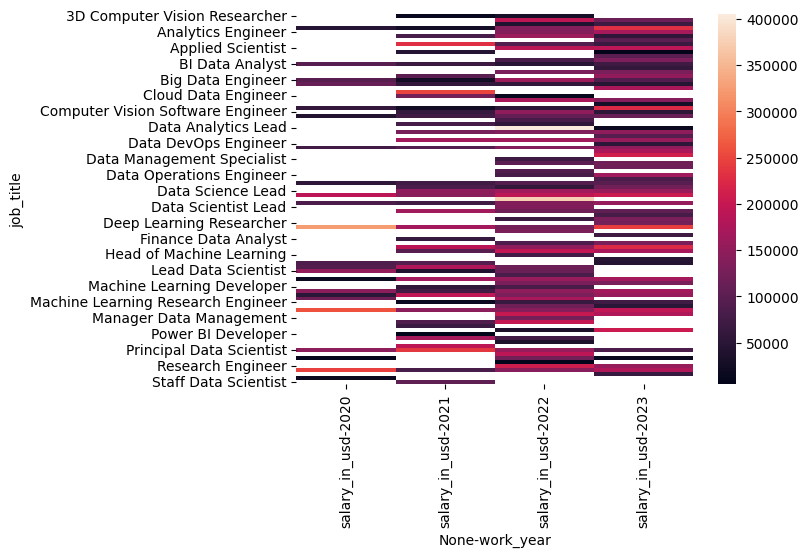

In [52]:
sns.heatmap(df.pivot_table(index="job_title",values=["salary_in_usd"],columns="work_year",aggfunc="mean"))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92],
 [Text(0, 0, 'Principal Data Scientist'),
  Text(0, 1, 'ML Engineer'),
  Text(0, 2, 'Data Scientist'),
  Text(0, 3, 'Applied Scientist'),
  Text(0, 4, 'Data Analyst'),
  Text(0, 5, 'Data Modeler'),
  Text(0, 6, 'Research Engineer'),
  Text(0, 7, 'Analytics Engineer'),
  Text(0, 8, 'Business Intelligence Engineer'),
  Text(0, 9, 'Machine Learning Engineer'),
  Text(0, 10, 'Data Strategist'),
  Text(0, 11, 'Data Engineer'),
  Text(0, 12, 'Computer V

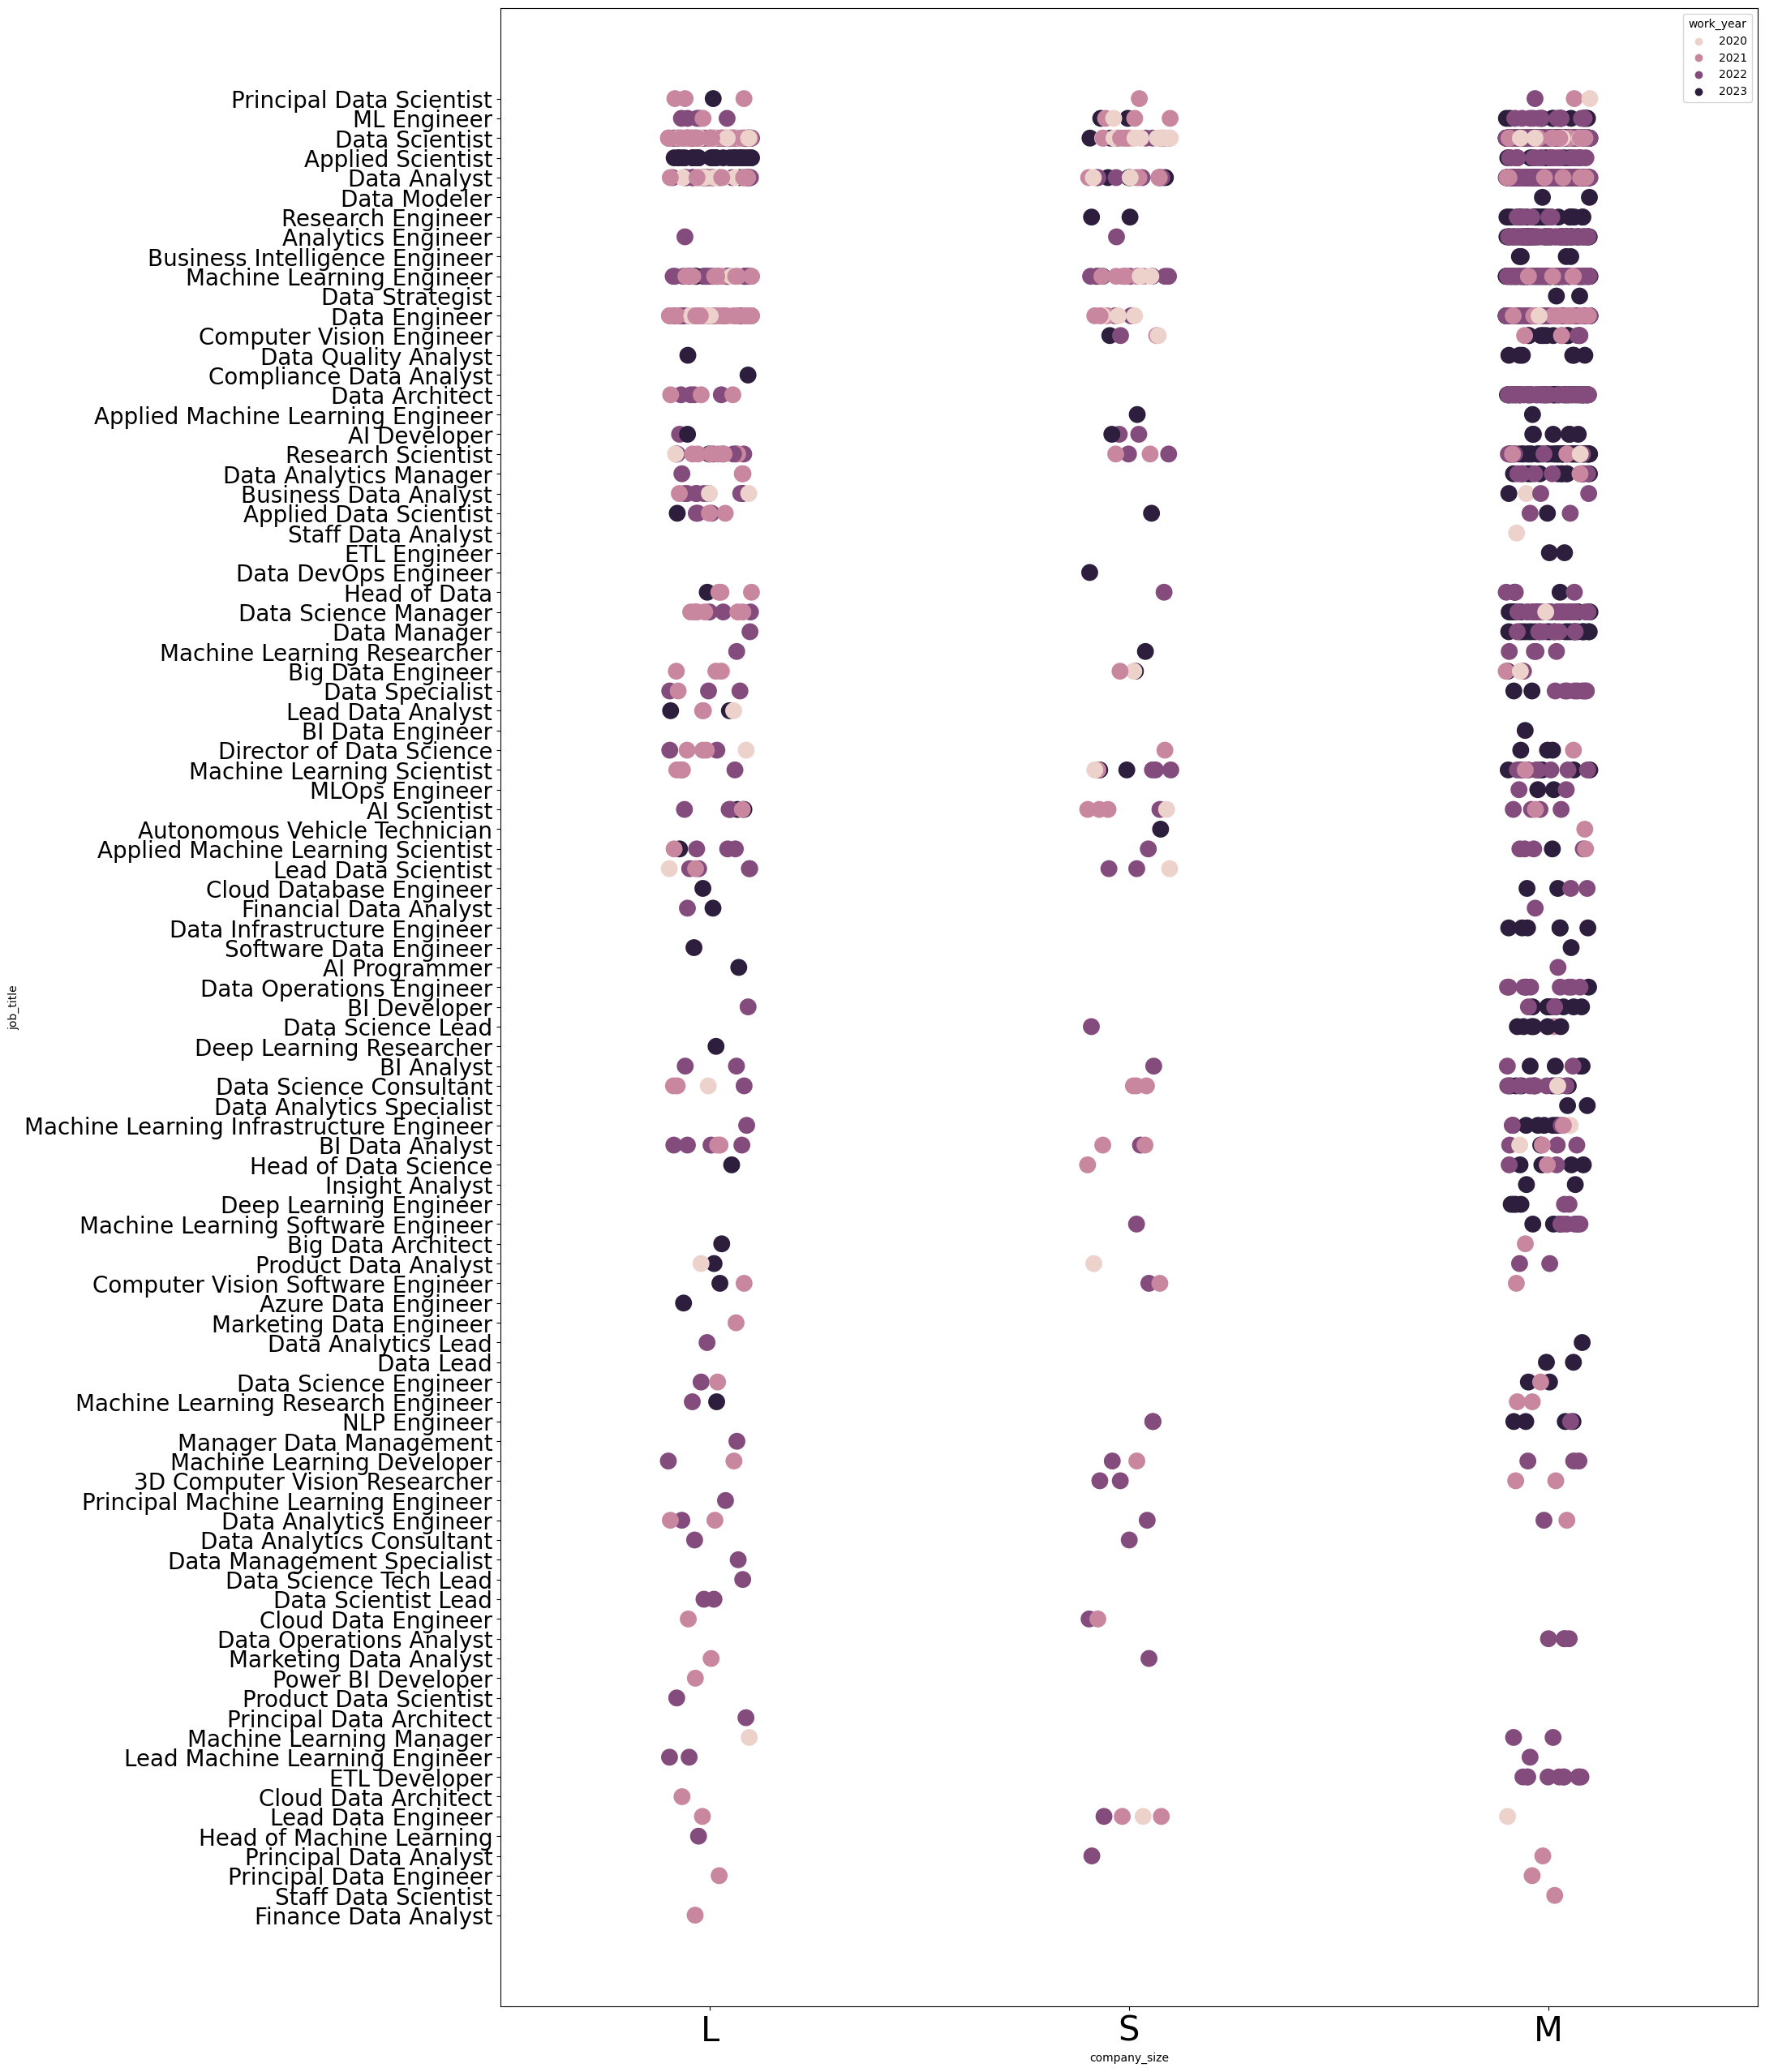

In [61]:

plt.figure(figsize=(20,32))

sns.stripplot(y=df["job_title"],x=df["company_size"],hue=df.work_year,size=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)

ValueError: Could not interpret input 'remote_ratio'

In [1]:
df.pivot_table(index=["work_year","remote_ratio"],columns=["company_location"],values="salary_in_usd",aggfunc="mean")

NameError: name 'df' is not defined

In [4]:
df["val_currency"]=df["salary_in_usd"]/df["salary"]
df.groupby("salary_currency").sum()["val_currency"].

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_14496\3842475459.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("salary_currency").sum()["val_currency"]


salary_currency
AUD       6.342710
BRL       1.143810
CAD      19.389677
CHF       4.222094
CLP       0.001317
CZK       0.042767
DKK       0.470867
EUR     257.080723
GBP     199.273133
HKD       0.127573
HUF       0.009224
ILS       0.282556
INR       0.780091
JPY       0.027572
MXN       0.046543
PLN       1.193807
SGD       4.457824
THB       0.058905
TRY       0.336190
USD    3224.000000
Name: val_currency, dtype: float64

In [1]:
df.groupby("salary_currency").sum()["val_currency"].sort_values().tail(5).plot(kind="bar")

NameError: name 'df' is not defined

<AxesSubplot: >

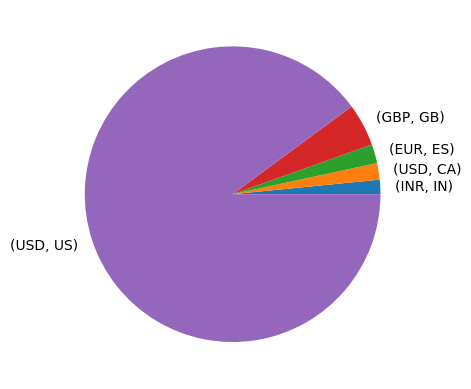

In [16]:
df[["salary_currency","company_location"]].groupby(["salary_currency","company_location"]).size().sort_values().tail(5).plot(kind="pie")